#Báo cáo máy học
Họ tên sinh viên: Trương Nhật Tiến _
Mssv: 20063731

Áp dụng những thuật toán giới thiệu trong bài giảng, so sánh đánh giá sự hiệu quả của các thuật toán đó và đưa ra những thuật toán cải tiến mới tốt hơn cho chấm điểm tín dụng và áp dụng cho một trong các tập dữ liệu chấm điểm tín dụng sau:

*   Tập dữ liệu Kaggle: https://www.kaggle.com/c/GiveMeSomeCredit





In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!python -m pip install --upgrade pip
!pip install joblib
!pip install scikit-learn-intelex

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import numpy as np

In [4]:
gitPath = "https://raw.githubusercontent.com/Nhattien02/Machinelearning/main/data/"
trainPath = f"{gitPath}cs-training.csv"
testPath = f"{gitPath}cs-test.csv"
submission= f"{gitPath}sampleEntry.csv"
dataDescriptorPath = f"{gitPath}Data Dictionary.xls".replace(" ", "%20")

In [5]:
train_data = pd.read_csv(trainPath,sep=',')
test_data = pd.read_csv(testPath)
submission = pd.read_csv(submission)
dataDescriptor = pd.read_excel(dataDescriptorPath)

In [6]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
test_data.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [8]:
print("ý nghĩa dữ liệu")
dataDescriptor

ý nghĩa dữ liệu


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


#1 Xử lí  dữ liệu

1.1 Loại bỏ dữ liệu dư thừa

ta thấy cột Unnamed: 0 là không cần thiết trong tập dữ liệu

In [9]:
train_data = train_data.drop(['Unnamed: 0'], axis=1)
test_data = test_data.drop(['Unnamed: 0'], axis=1)

print(train_data.columns)
print(test_data.columns)

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


1.2 Bổ xung các giá trị bị thiếu

kiểm tra các giá trị còn thiếu theo cột

In [10]:
train_data.isnull().sum().sort_values(ascending=False)

MonthlyIncome                           29731
NumberOfDependents                       3924
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
dtype: int64

cột MonthlyIncome, NumberOfDependents có giá trị null

Bổ sung các giá trị null bằng giá trị mean của cột đó

In [11]:
train_data.MonthlyIncome.fillna(train_data.MonthlyIncome.mean(), inplace=True)
train_data.isnull().sum().sort_values(ascending=False)

NumberOfDependents                      3924
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
dtype: int64

In [12]:
train_data.NumberOfDependents.fillna(train_data.NumberOfDependents.mean(), inplace=True)
train_data.isnull().sum().sort_values(ascending=False)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

cột MonthlyIncome, NumberOfDependents không còn giá trị null

Tương tự với tập test

1.3 Xoá giá trị trùng lặp

kiểm tra giá trị trùng lặp

In [13]:
print('tổng giá trị trùng lặp: ', train_data.duplicated().sum())
print('Kích thước tập: ', train_data.shape)

tổng giá trị trùng lặp:  609
Kích thước tập:  (150000, 11)


xoá giá trị trùng lặp

In [14]:
train_data = train_data.drop_duplicates()
print('Kích thước tập sau khi xoá các giá trị trùng lặp: ', train_data.shape)

Kích thước tập sau khi xoá các giá trị trùng lặp:  (149391, 11)


1.4 Loại bỏ các giá trị ngoại lai

quan sát dữ liệu cột age

In [15]:
train_data.age.describe()

count    149391.000000
mean         52.306237
std          14.725962
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

Ta nhận thấy tuổi bằng 0 thì không thể vay vốn

<Axes: ylabel='age'>

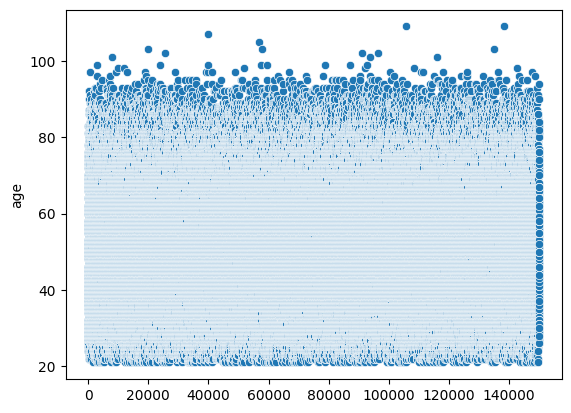

In [16]:
train_data.drop(train_data[train_data.age == 0].index, inplace=True)
sns.scatterplot(train_data.age)

1.5 Cân bằng dữ liệu

quan sát dữ liệu cột SeriousDlqin2yrs

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

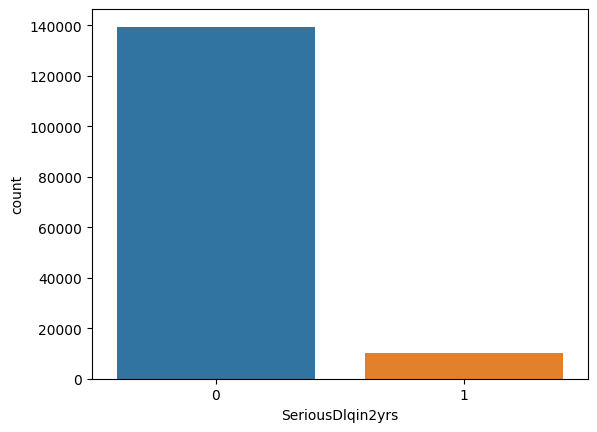

In [17]:
sns.countplot(x='SeriousDlqin2yrs', data=train_data)

In [18]:
x = train_data.drop("SeriousDlqin2yrs", axis=1)
y = train_data["SeriousDlqin2yrs"]

Ta có thể thấy ở đây xuất hiện sự không cân bằng và chênh lệch, để cân bằng dữ liệu, ta cần đảm bảo rằng tỷ lệ giữa các lớp dữ liệu ít nhất là 5:5 hoặc 6:4. Một phương pháp khắc phục thông qua Oversampling là sử dụng kỹ thuật SMOTE

<Axes: xlabel='target', ylabel='count'>

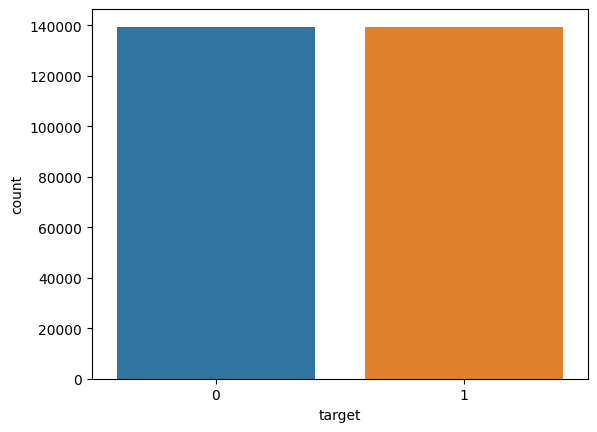

In [19]:
oversample = SMOTE(sampling_strategy='auto', random_state=100)
xSmoted, ySmoted = oversample.fit_resample(x, y)

data = xSmoted.copy()
data['target'] = ySmoted
sns.countplot(x='target', data=data)

#2.Chuẩn hoá dữ liệu

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns

Chuẩn hoá dữ liệu

In [21]:
Scaler= StandardScaler()
Scaler.fit_transform(xSmoted)

array([[-0.02065372, -0.29100921,  0.11225248, ...,  4.53327417,
        -0.09834723,  1.08501333],
       [-0.01967377, -0.64940372, -0.13576976, ..., -0.77062959,
        -0.09834723,  0.14659143],
       [-0.02120748, -0.79276152, -0.01175864, ..., -0.77062959,
        -0.09834723, -0.79183048],
       ...,
       [-0.02314498,  0.282422  , -0.01175864, ...,  0.11335437,
        -0.09834723, -0.79183048],
       [-0.02024755,  1.07088991, -0.01175864, ..., -0.77062959,
        -0.09834723,  0.14659143],
       [-0.02227886,  0.06738529, -0.13576976, ..., -0.77062959,
        -0.09834723,  0.13472038]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(xSmoted, ySmoted, test_size=0.2, random_state=100)

models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
scores = []
modelNames=[]

for model in models:
  name=type(model).__name__
  modelNames.append(name)
  model.fit(x_train,y_train)
  sc=model.score(x_test,y_test)
  scores.append(sc)
  print(f"Model: {name}.Score: {sc}")
  y_pre=model.predict(x_test)

  print(classification_report(y_test,y_pre))

Model: LogisticRegression.Score: 0.6763402866213477
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     27889
           1       0.79      0.48      0.60     27864

    accuracy                           0.68     55753
   macro avg       0.71      0.68      0.66     55753
weighted avg       0.71      0.68      0.66     55753

Model: DecisionTreeClassifier.Score: 0.8790199630513156
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     27889
           1       0.87      0.89      0.88     27864

    accuracy                           0.88     55753
   macro avg       0.88      0.88      0.88     55753
weighted avg       0.88      0.88      0.88     55753

Model: KNeighborsClassifier.Score: 0.8442056929671946
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     27889
           1       0.79      0.94      0.86     27864

    accuracy        

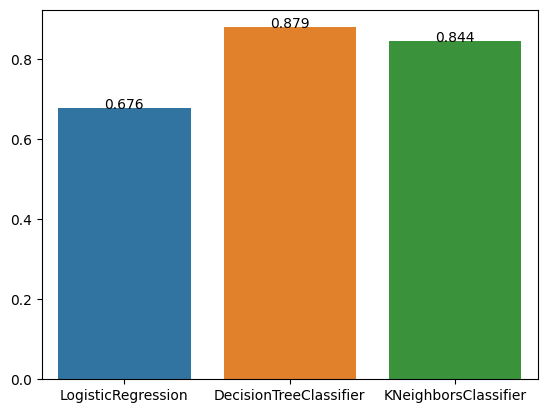

In [24]:
import seaborn as sns
ax=sns.barplot(x=modelNames,y=scores)
for i, v in enumerate(scores):
  ax.text(i, v, str(round(v, 3)), color='black', ha='center')

#Đánh giá


   -  Mô hình LogisticRegression:
  
          - Precision: Mô hình có độ chính xác là 0.63 cho lớp 0 và 0.79 cho lớp 1.
          - Recall: Mô hình có độ phục hồi là 0.87 cho lớp 0 và 0.48 cho lớp 1.
          - F1-score: F1-score là 0.73 cho lớp 0 và 0.60 cho lớp 1.
          - Accuracy: Độ chính xác tổng thể của mô hình là 0.676.

   -  Mô hình DecisionTreeClassifier:
          - Precision: Mô hình có độ chính xác là 0.89 cho lớp 0 và 0.87 cho lớp 1.
          - Recall: Mô hình có độ phục hồi là 0.86 cho lớp 0 và 0.89 cho lớp 1.
          - F1-score: F1-score là 0.88 cho lớp 0 và 0.88 cho lớp 1.
          - Accuracy: Độ chính xác tổng thể của mô hình là 0.88.

   -  Mô hình KNeighborsClassifier:
          -  Precision: Mô hình có độ chính xác là 0.92 cho lớp 0 và 0.79 cho lớp 1.
          - Recall: Mô hình có độ phục hồi là 0.75 cho lớp 0 và 0.94 cho lớp 1.
          - F1-score: F1-score là 0.83 cho lớp 0 và 0.86 cho lớp 1.
          - Accuracy: Độ chính xác tổng thể của mô hình là 0.84.

